In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.data.shape

(506, 13)

In [6]:
columnNames = boston.feature_names
columnNames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
Data = pd.DataFrame(boston.data, columns = columnNames)

In [8]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
Data_Labels = boston.target
Data_Labels.shape

(506,)

In [10]:
Data["PRICE"] = Data_Labels

In [11]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(Data, Data["PRICE"], test_size = 0.2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [13]:
m = X_train.shape[0]

In [14]:
#Performing Stochastic Gradient Descent by taking 10 random samples

weight = np.random.randn(13)*np.sqrt(2/m)   # defining initial random weight from normal distribution
b = np.random.randn(1)*np.sqrt(2/m)   # generating initial random y-intercept from normal distribution

learningRate = 0.2

for i in range(2500):    # running 2500 iterations
    Data_batch_10 = X_train.sample(n = 10)   # taking 10 stochastic samples
    X_temp = Data_batch_10.drop("PRICE", axis = 1, inplace = False)
    X_std = StandardScaler().fit_transform(X_temp)
    X = pd.DataFrame(X_std, columns = columnNames)
    Y = Data_batch_10["PRICE"]
    PartialGradient = np.empty(13)
    sum2 = 0
    
    for j in range(13):     # as there are 13 dimensions in our dataset so dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b)  # Derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
    PartialGradient *= learningRate
        
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b)     # Derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2       #updating y-intercept 'b'
    

    for l in range(13):
        weight[l] -= PartialGradient[l]  # updating weights
        
    learningRate = 0.01 / pow(i+1, 0.25)     #learning rate at every iteration
    
    weight = weight + 0.0001*np.dot(weight, weight)   #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization

print("Weight = "+str(weight))
print("b = "+str(b))

Weight = [-0.42507827  0.89545943  0.49559221  1.55135631 -1.18690639  2.63388264
  0.28688633 -1.6692329   1.48496181 -1.6248733  -1.81742246  0.73851194
 -3.64071621]
b = [22.46605214]


In [15]:
X_temp = X_train.drop("PRICE", axis = 1, inplace = False)
X_std = StandardScaler().fit_transform(X_temp)
X = pd.DataFrame(X_std, columns = columnNames)
Y = Y_train

X_test_temp = X_test.drop("PRICE", axis = 1, inplace = False)
X_test_std = StandardScaler().fit_transform(X_test_temp)
X_te = pd.DataFrame(X_test_std, columns = columnNames)
Y_te = Y_test

clf = SGDRegressor(shuffle = False, learning_rate= 'invscaling', max_iter = 2500)
clf.fit(X, Y)

Y_pred = clf.predict(X_te)

print("Weight = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weight = [-0.90354507  1.2553414   0.15213084  0.69275735 -2.21390911  2.1467954
 -0.07652855 -3.20018901  2.64126983 -1.72810161 -2.0911758   0.86366835
 -4.20289926]
Y Intercept = [22.31625296]


In [16]:
d2 = {'True Labels': Y_te, 'Predicted Labels': Y_pred}
df2 = pd.DataFrame(data = d2)
df2

,True Labels,Predicted Labels
486,19.1,19.663336
434,11.7,15.225097
404,8.5,7.824731
123,17.3,15.432484
294,21.7,24.256351
...,...,...
438,8.4,4.148642
424,11.7,14.912539
426,10.2,16.399674
310,16.1,19.447074


In [17]:
Mean_Sq_Error = mean_squared_error(Y_te, Y_pred)
Mean_Sq_Error

24.419996930797637

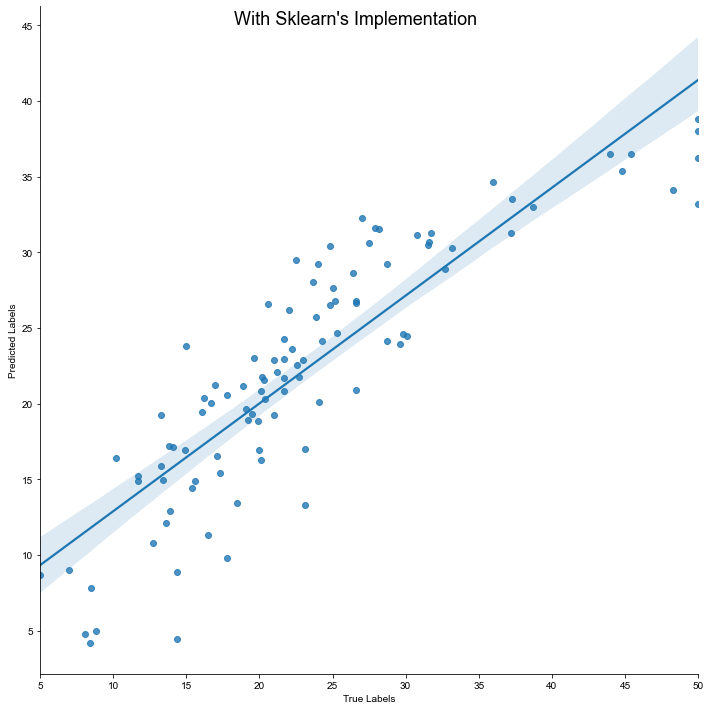

In [18]:
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df2, height = 10)

fig2 = lm2.fig 

# Add a title to the Figure
fig2.suptitle("With Sklearn's Implementation", fontsize=18)

sns.set(font_scale = 1.5)